In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001143155"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001143155
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,"Xenith Bankshares, Inc."
Ticker,


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,14.0,5.538571e+00,6.615429e+00,0.23,1.177500e+00,3.61,4.917500e+00,20.65
interest income,21.0,2.391036e+07,1.714271e+07,4363455.00,1.810800e+07,18781000.00,2.737200e+07,92417000.00
net income,29.0,-2.122583e+06,2.886974e+07,-96228000.00,-4.923000e+06,1728691.00,3.254000e+06,88769000.00
net interest income,29.0,1.892961e+07,1.217437e+07,3176698.00,1.511500e+07,15930000.00,1.823400e+07,76869000.00
provision for loan losses,29.0,6.880931e+06,1.365501e+07,0.00,0.000000e+00,102000.00,1.068500e+07,65666000.00


# Plots

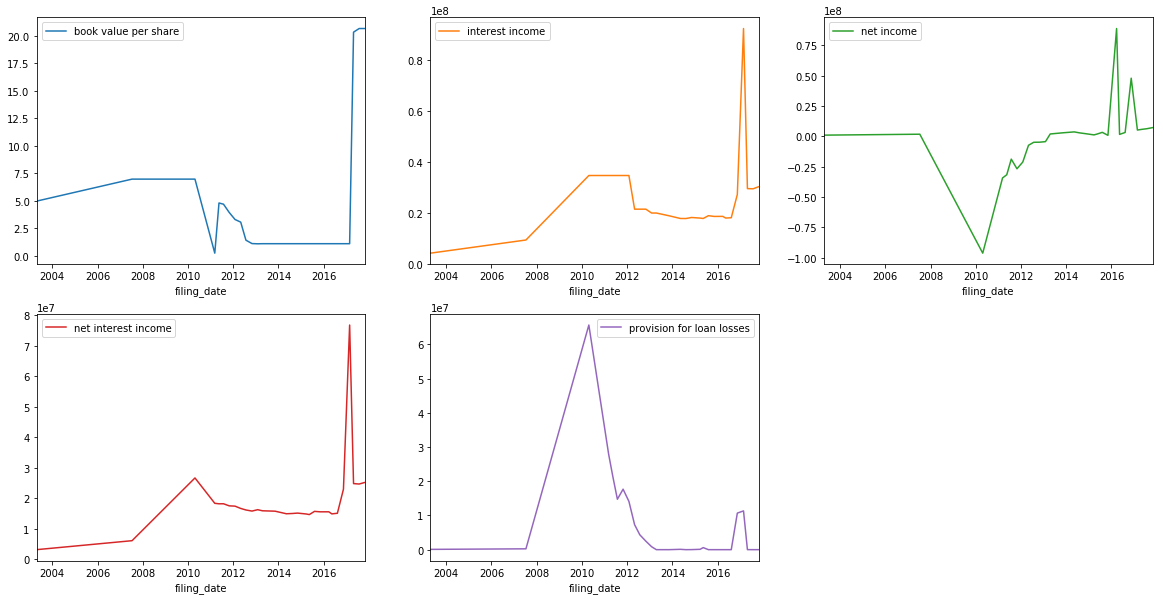

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0001143155 book value per share       2003Q2 to 2007Q1: 16 periods  missing   
           book value per share       2007Q3 to 2010Q3: 13 periods  missing   
           book value per share       2013Q2 to 2016Q4: 15 periods  missing   
           book value per share                             2017Q3  missing   
           interest income            2003Q2 to 2007Q1: 16 periods  missing   
           interest income             2007Q3 to 2009Q3: 9 periods  missing   
           interest income             2010Q1 to 2011Q4: 8 periods  missing   
           interest income             2012Q2 to 2012Q3: 2 periods  missing   
           interest income             2013Q1 to 2013Q2: 2 periods  missing   
           interest income                                  2013Q4  missing   
           net income                 2003Q2 to 2007Q1: 16 periods  missing   
           net income                  2007Q3 to 2009Q3: 9 periods  missing   
           net income                  2010Q1 to 2010Q3: 3 periods  missing   
           net income                                       2013Q2  missing   
           net income                                       2013Q4  missing   
           net interest income        2003Q2 to 2007Q1: 16 periods  missing   
           net interest income         2007Q3 to 2009Q3: 9 periods  missing   
           net interest income         2010Q1 to 2010Q3: 3 periods  missing   
           net interest income                              2013Q2  missing   
           net interest income                              2013Q4  missing   
           provision for loan losses  2003Q2 to 2007Q1: 16 periods  missing   
           provision for loan losses   2007Q3 to 2009Q3: 9 periods  missing   
           provision for loan losses   2010Q1 to 2010Q3: 3 periods  missing   
           provision for loan losses                        2013Q2  missing   
           provision for loan losses                        2013Q4  missing   
           total revenue                                      None    empty   

                                                 message  
cik        item                                           
0001143155 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()